<div class='alert alert-box alert-info'>
    <b> Importing Libraries<b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<div class='alert alert-box alert-info'>
    <b>Data Import and Understanding<b>

In [2]:
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [4]:
# listing the columns with the null values in a presentable format
collist, datatypes, null_values, pnull = [], [], [], []
for i in df: collist.append(i), datatypes.append(df[i].dtypes), null_values.append(df[i].isnull().sum().sum()), pnull.append(round(100-(df[i].shape[0]-df[i].isnull().sum().sum())/df[i].shape[0]*100,2))

df_missing = pd.DataFrame({"Columns":collist,"Datatypes":datatypes,"Null Values":null_values,"Null Values in %":pnull}).sort_values(by="Null Values in %",ascending=False)
df_missing

,Columns,Datatypes,Null Values,Null Values in %
6,Sunshine,float64,3994,47.41
5,Evaporation,float64,3512,41.69
18,Cloud3pm,float64,2455,29.14
17,Cloud9am,float64,2421,28.74
16,Pressure3pm,float64,1312,15.57
15,Pressure9am,float64,1309,15.54
7,WindGustDir,object,991,11.76
8,WindGustSpeed,float64,991,11.76
9,WindDir9am,object,829,9.84
10,WindDir3pm,object,308,3.66


__Observation:__ 🔎
- Every column apart from `Date` and `Location` has null values.
- Most amount of null values can be seen in the `Sunshine` and `Evaporation` column with more than _47%_ and _41%_ of the data consisting of null values.
- There are quite a few columns that contain less than 1% null values. However, we will try various methods of filling the missing values such as:
    - _linear interpolation_
    - _backwards fill_
    - _forwards fill_
    - _mean and mode_ 
- In total __5__ columns of __object__ datatype have null values and __16__ columns of __float__ datatype have null values.

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


__Observation:__ 🔎
- The `lowest temperature` recorded is __-2°C__.
- The `highest temperature` recorded is __45.5°C__.
- The most amount of `rainfall` recorded in a day (_in mm_) is __371 mm__ and lowest being __0 mm__.
- The most amount hours of `sunshine` recorded in a day is __13.9 hours__ and lowest is __0 hours__
- The fastest recorded `wind speed` in a day is __107 km/h__ and lowest being __7 km/h__.

<div class='alert alert-box alert-info'>
    <b>Data Visualization<b>

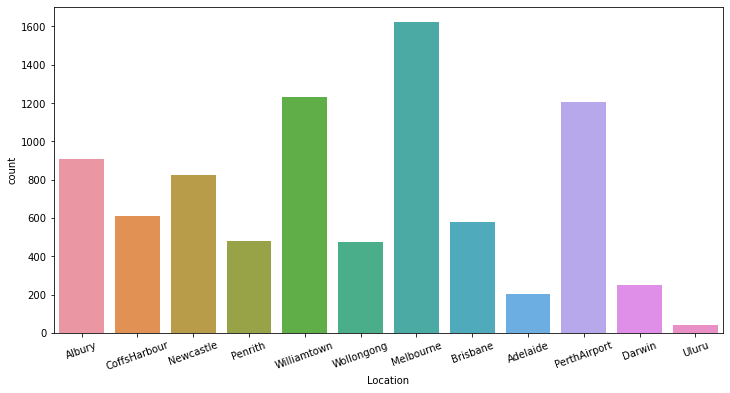

In [6]:
#visualizing the location data 
plt.figure(figsize=(12,6))
sns.countplot(x=df.Location)
plt.xticks(rotation=20)
plt.show()

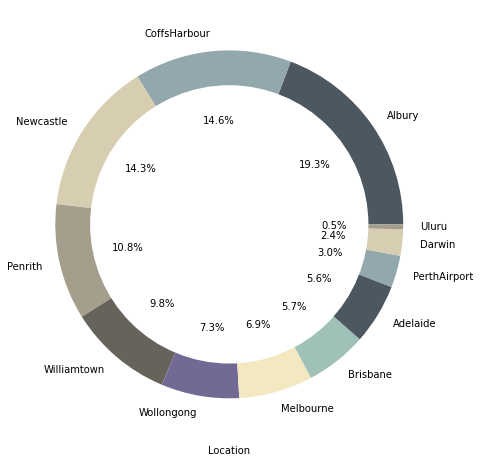

In [7]:
plt.figure(figsize=(8,8))
plt.pie(df.Location.value_counts(),autopct='%1.1f%%',labels=df.Location.unique(),
            colors=[('#4C5760'),('#93A8AC'),('#D7CEB2'),('#A59E8C'),('#66635B'),('#726A95'),('#F4E8C1'),('#A0C1B8')])
plt.gca().add_artist(plt.Circle((0,0), 0.8, fc='w'))
plt.xlabel("Location")
plt.show()

__Observation:__ 🔎
- Majority of the data was gathered from cities on the __SE__ side of Australia (_Coastal areas_).
    - CoffsHarbour
    - Penrith
    - Williamtown
    - Wollongong
    - Brisbane
- The rest of the cities are scattared throughout the __coastal areas__ of Australia. 
- The only area which is not city and is located in the __middle__ of Australia is Uluru (_which is in a National Park_)

<div class='alert alert-box alert-info'>
    <b>Data Processing<b>

In [8]:
# seperating the date into different columns for easier understanding and to increase the model prediction
df.Date = pd.to_datetime(df.Date, format = "%Y-%m-%dT")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [9]:
df.drop('Date',axis=1,inplace=True)

In [10]:
df[['Year','Month','Day']]
# df['Month'].value_counts()

,Year,Month,Day
0,2008,12,1
1,2008,12,2
2,2008,12,3
3,2008,12,4
4,2008,12,5
...,...,...,...
8420,2017,6,21
8421,2017,6,22
8422,2017,6,23
8423,2017,6,24


In [11]:
cat_feats = [i for i in df if df[i].dtypes=='O']
num_feats = [i for i in df if df[i].dtypes!='O']

In [12]:
# label encoding categorical features
from sklearn.preprocessing import LabelEncoder
for i in cat_feats:
    df[i] = LabelEncoder().fit_transform(df[i])
#     df[i]=df[i].astype('float')

In [13]:
# filling the categorical features with the mode
for c in cat_feats:
    if df[c].isnull().sum()>0: 
        df[c] = df[c].fillna(df[c].mode()) 

In [14]:
# filling the numerical features with backwards fill and forwards fill (in nase there are empty values still left in the dataset)
for n in num_feats:
    if df[n].isnull().sum()>0:
        df[n] = df[n].fillna(method='ffill') # fill the values using forward fill
        if df[n].isnull().sum()>0:
            df[n] = df[n].fillna(method='bfill') # if null values still exist, use backwards fill

<div class='alert alert-box alert-info'>
    <b>Additional Data Visualization<b>

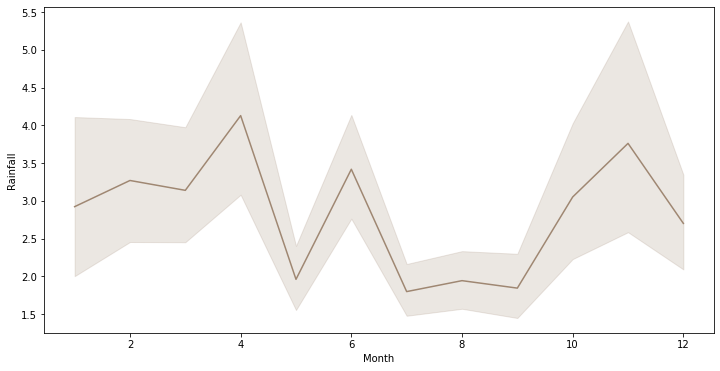

In [57]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Month',y='Rainfall',data=df,color=('#9F8772'))
plt.show()

__Observation:__ 🔎
- Peak rainfall can be observed in __March-April__, __June__ and __November__ months of the year.

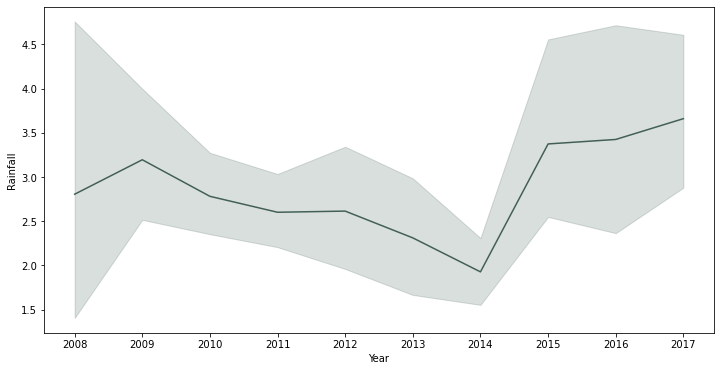

In [49]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Rainfall',data=df,color=('#425F57'))
plt.xticks(df.Year.unique())
plt.show()

__Observation:__ 🔎
- We can notice that rainfall has been increasing over the years and the mean peak `Rainfall` was the highest in __2017__

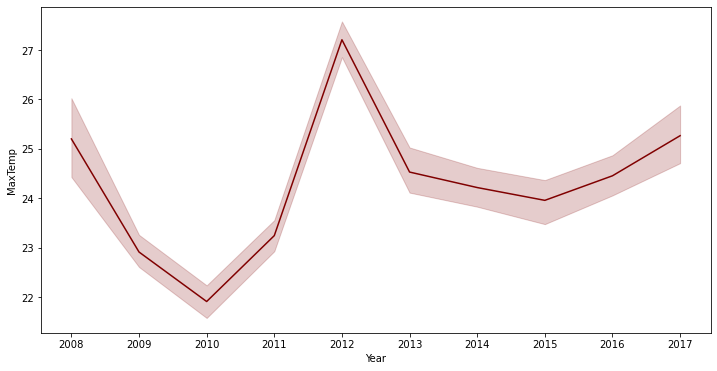

In [69]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.Year,y=df.MaxTemp,color='maroon')
plt.xticks(df.Year.unique())
plt.show()

__Observation:__ 🔎
- The `max temperatures` were the highest in __2012__

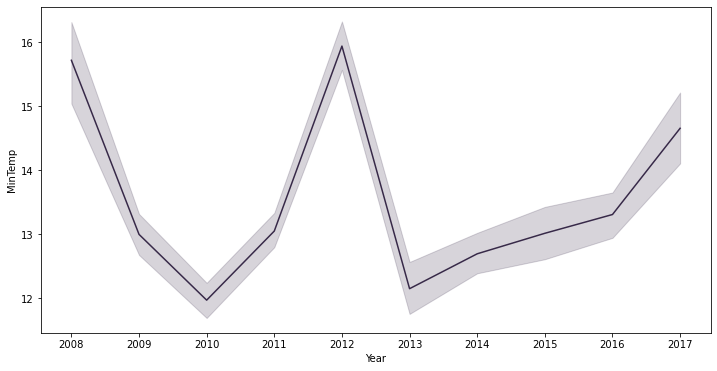

In [71]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.Year,y=df.MinTemp,color='#372948')
plt.xticks(df.Year.unique())
plt.show()

__Observation:__ 🔎
- The `min temperatures` were the lowest in __2010__ in __2013__

<div class='alert alert-box alert-info'>
    <b>Outliers, Skewness and VIF<b>

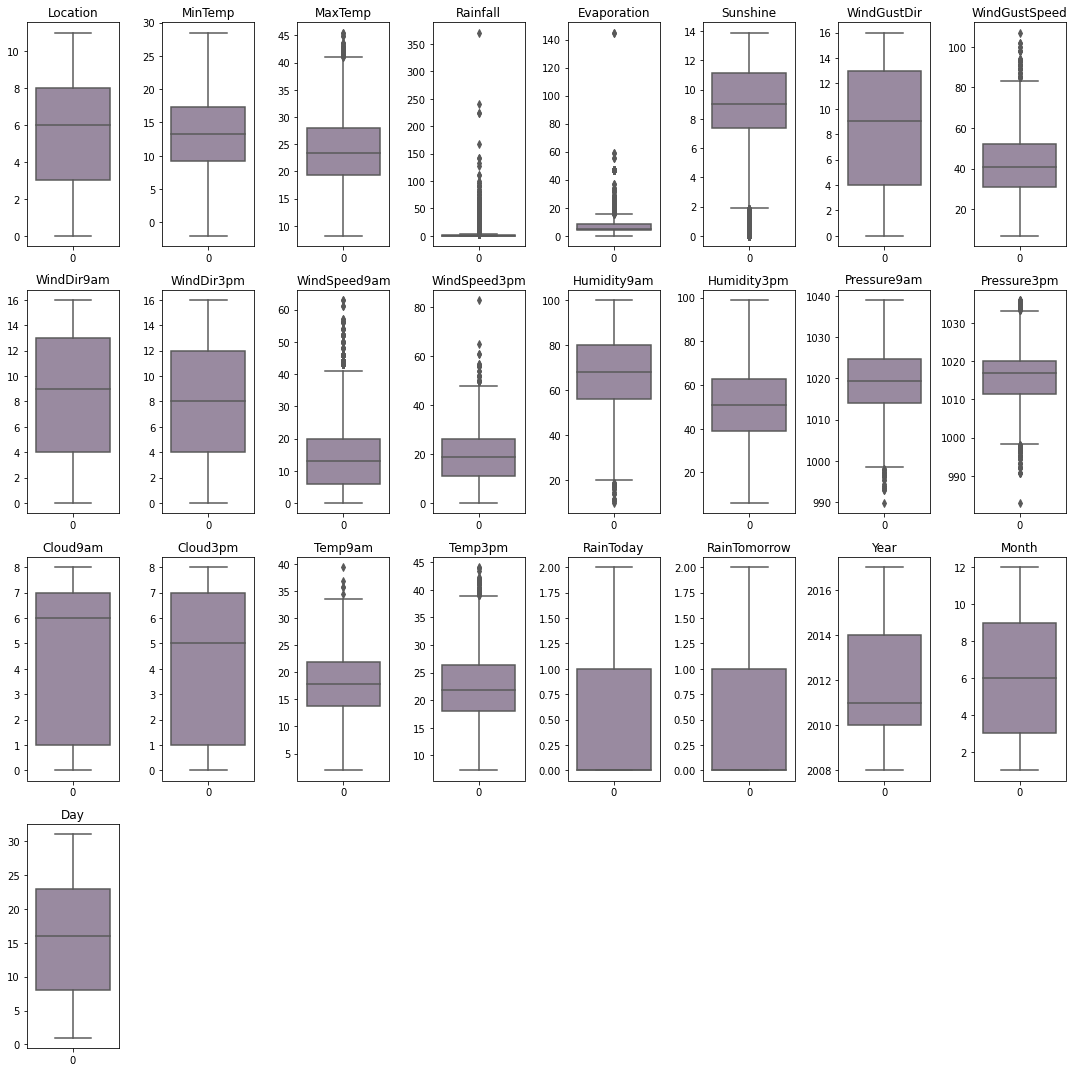

In [15]:
collist = df.columns.values
nrows = 4
ncols = 8

plt.figure(figsize=(15,15))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=df[collist[i]],orient='v',palette=['#9A86A4'])
    plt.title(collist[i])
    plt.tight_layout()

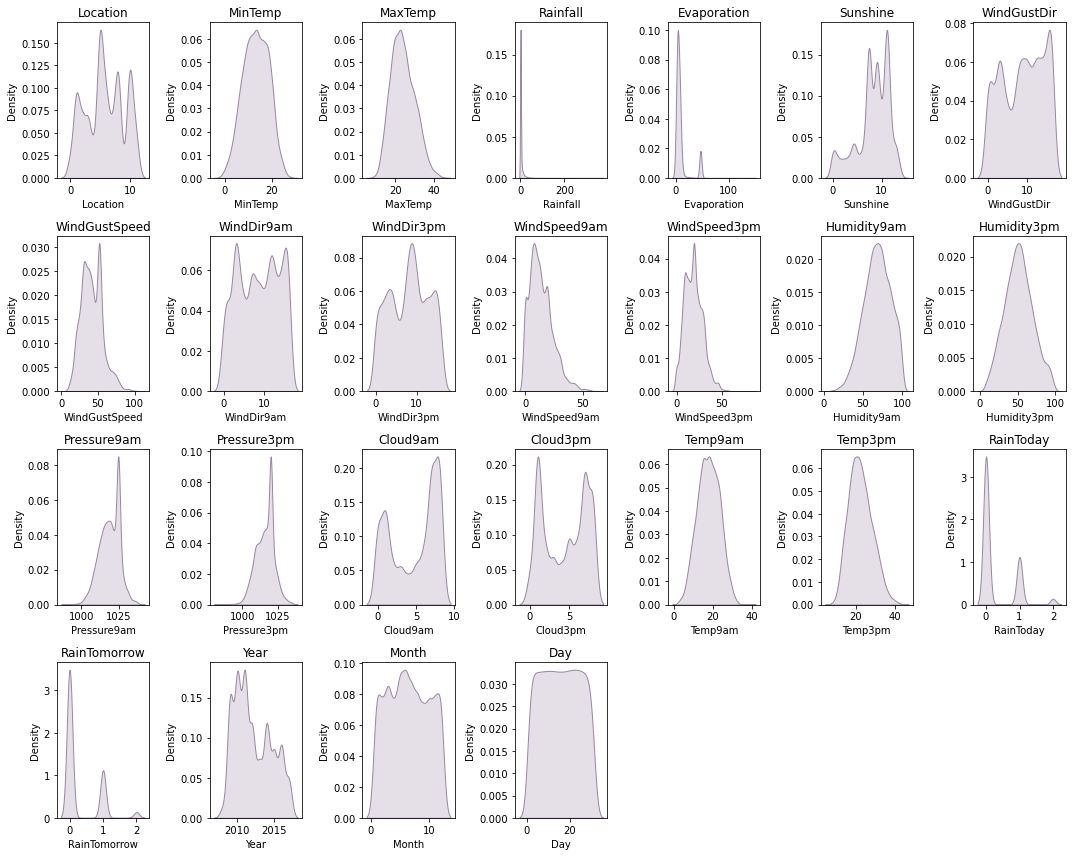

In [85]:
# skewness
collist = df.columns.values
nrows = 4
ncols = 7

plt.figure(figsize=(15,12))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.kdeplot(data=df[collist[i]],color='#9A86A4',fill=1)
    plt.title(collist[i])
    plt.tight_layout()

In [16]:
from scipy.stats import zscore

z = np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]
print ("Percentage of data loss =",(df.shape[0]-df_new.shape[0])/df.shape[0]*100,'%')

Percentage of data loss = 7.774480712166172 %


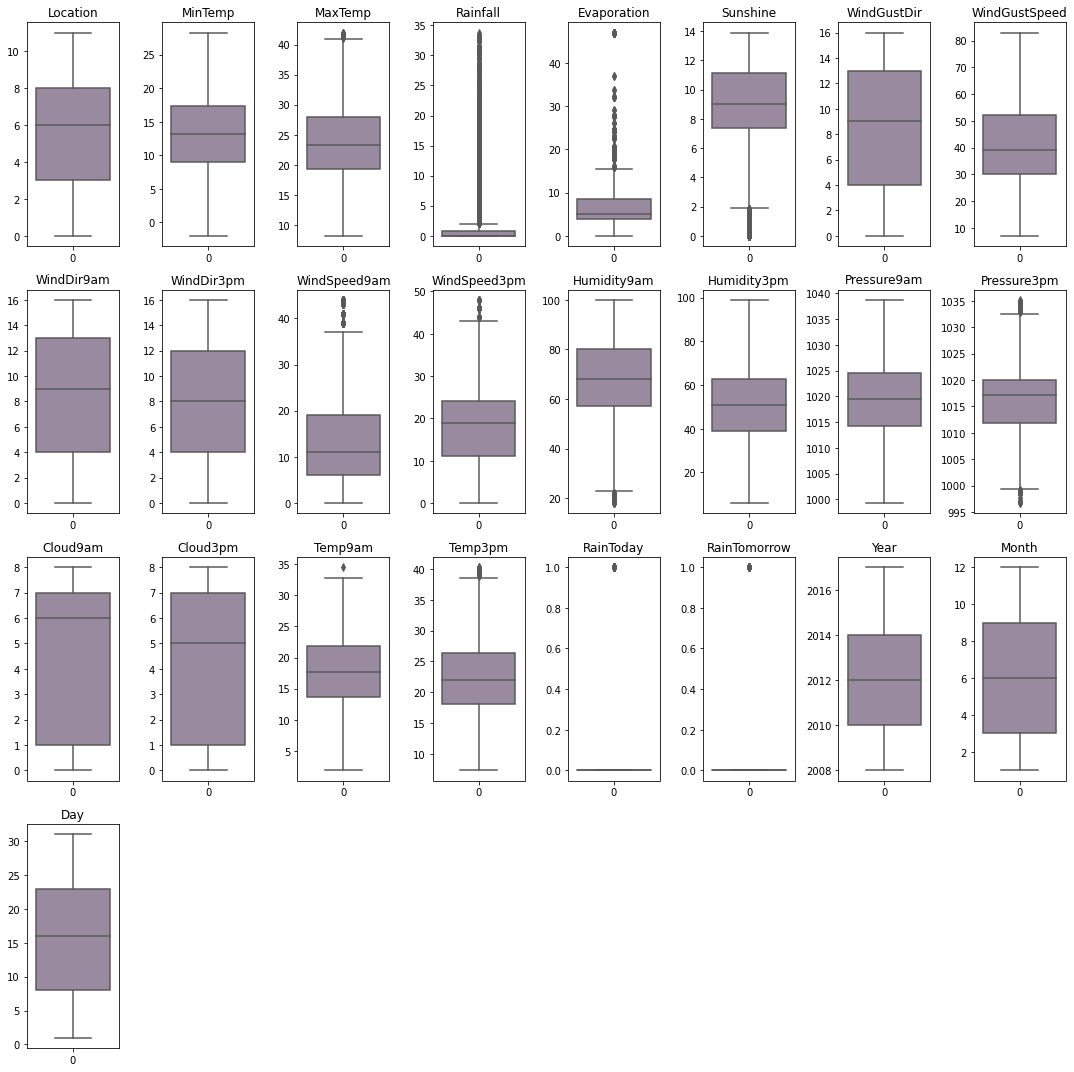

In [17]:
collist = df_new.columns.values
nrows = 4
ncols = 8

plt.figure(figsize=(15,15))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=df_new[collist[i]],orient='v',palette=['#9A86A4'])
    plt.title(collist[i])
    plt.tight_layout()

In [18]:
# checking multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['Columns'] = df_new.columns
VIF['VIF_Factor'] = [variance_inflation_factor(df_new.values,i) for i in range(df_new.shape[1])]
VIF

,Columns,VIF_Factor
0,Location,6.661602
1,MinTemp,56.028486
2,MaxTemp,444.343684
3,Rainfall,2.304372
4,Evaporation,2.467974
5,Sunshine,15.076441
6,WindGustDir,6.572729
7,WindGustSpeed,19.498522
8,WindDir9am,5.499328
9,WindDir3pm,5.971898


In [19]:
# dropping columns with high VIF>100

df_new = df_new.drop(df_new[['MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Year']],axis=1)

In [20]:
# using IQR method for outlier removal

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print ("Percentage of data loss =",(df.shape[0]-df_IQR.shape[0])/df.shape[0]*100,'%')

Percentage of data loss = 34.67062314540059 %


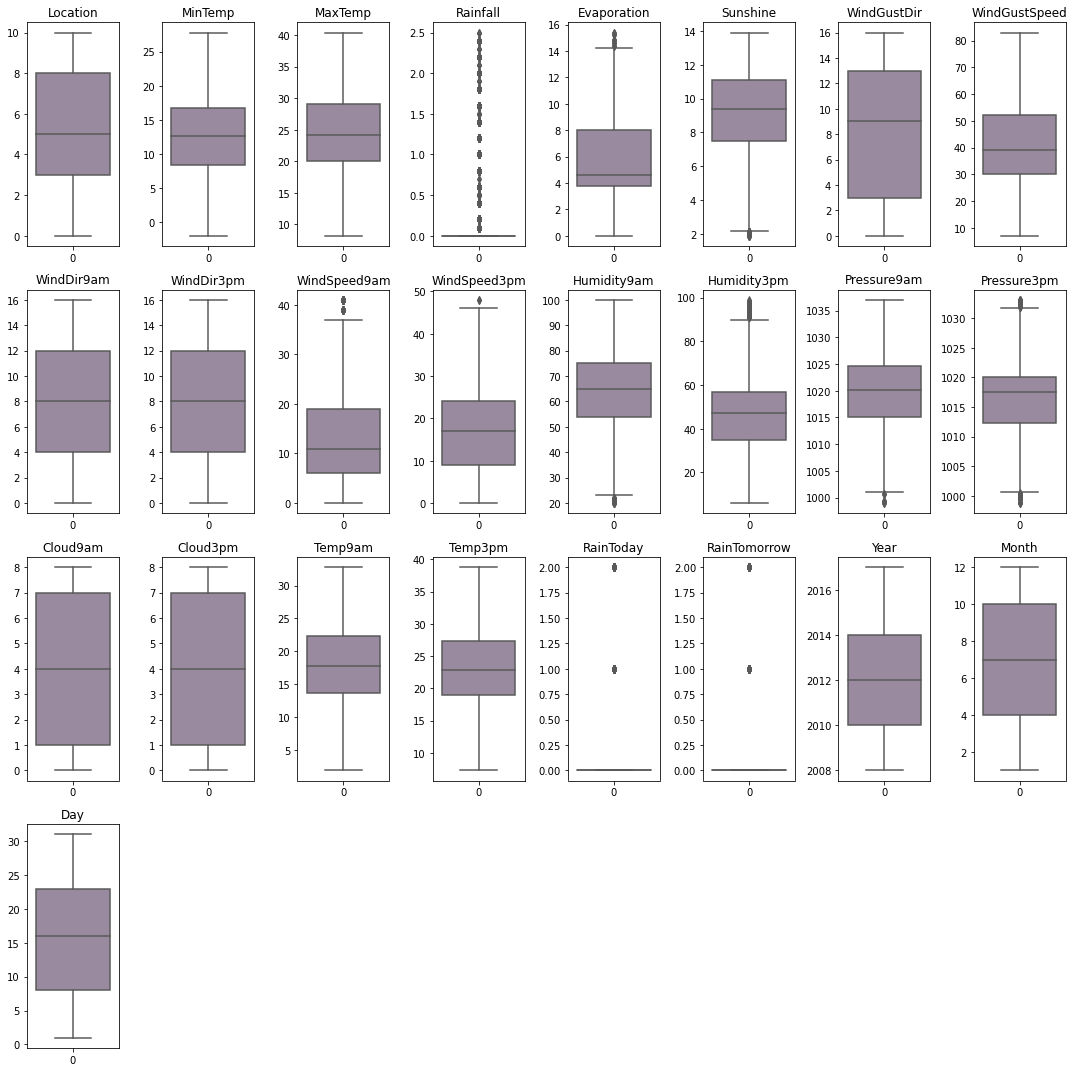

In [21]:
collist = df_IQR.columns.values
nrows = 4
ncols = 8

plt.figure(figsize=(15,15))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data=df_IQR[collist[i]],orient='v',palette=['#9A86A4'])
    plt.title(collist[i])
    plt.tight_layout()

In [22]:
# checking multicollinearity 
VIF = pd.DataFrame()
VIF['Columns'] = df_IQR.columns
VIF['VIF_Factor'] = [variance_inflation_factor(df_IQR.values,i) for i in range(df_IQR.shape[1])]
VIF

,Columns,VIF_Factor
0,Location,5.354875
1,MinTemp,48.514973
2,MaxTemp,498.395098
3,Rainfall,1.796451
4,Evaporation,8.415613
5,Sunshine,28.857653
6,WindGustDir,6.302988
7,WindGustSpeed,19.472713
8,WindDir9am,5.157271
9,WindDir3pm,5.747605


- using zscore method over IQR because less data loss and high accuracy

<div class='alert alert-box alert-info'>
    <b>Splitting into x & y<b>

In [23]:
x = df_new.drop('RainTomorrow',axis=1)
y = df_new['RainTomorrow']

In [24]:
from sklearn.preprocessing import StandardScaler, power_transform

x = StandardScaler().fit_transform(x)
# x = power_transform(x, method='yeo-johnson')

<div class='alert alert-box alert-info'>
    <b>Model Building<b>

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=8)

In [26]:
from imblearn.over_sampling import SMOTE
# using SMOTE to balance the training data
x_train, y_train = SMOTE().fit_sample(x_train,y_train)

In [27]:
y_train.value_counts()

0    4506
1    4506
Name: RainTomorrow, dtype: int64

In [28]:
# making a function for roc_auc score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test,y_pred):
    y_test_new = LabelBinarizer().fit_transform(y_test)
    y_pred_new = LabelBinarizer().fit_transform(y_pred)
    return round(roc_auc_score(y_test_new,y_pred_new)*100,2)

In [31]:
# making a function for classification models
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

Model, score, f1, cross, roc_auc = [], [], [], [], []

def classification_model(model):
    Model.append(str(model).split("(")[0])
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    scoree = round(accuracy_score(y_test,y_pred)*100,2)
    score.append(scoree)
    
    f1_s = round(f1_score(y_test,y_pred,average='micro')*100,2)
    f1.append(f1_s)
    
    cross_v = cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    cross.append(cross_v)
    
    roc_ = multiclass_roc_auc_score(y_test,y_pred)
    roc_auc.append(roc_)
    
    print ("Model:",str(model).split("(")[0])
    print ("Accuracy Score:",scoree)
    print ("f1 Score:",f1_s)
    print ("CV Score:",cross_v)
    print ("ROC_AUC Score:",roc_)

#      shows the classification report
    class_report = classification_report(y_test,model.predict(x_test))
    print (class_report)
    
    
#     shows the confusion matrix
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,square=True)

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_para = {'penalty':['l1','l2','elasticnet','none'],'C':range(1,10)}
gs_lr = GridSearchCV(lr,lr_para,cv=3,scoring='accuracy')
gs_lr.fit(x_train,y_train)
gs_lr.best_params_

{'C': 1, 'penalty': 'l2'}

Model: LogisticRegression
Accuracy Score: 77.41
f1 Score: 77.41
CV Score: 0.8247104247104249
ROC_AUC Score: 76.46
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1485
           1       0.51      0.75      0.61       458

    accuracy                           0.77      1943
   macro avg       0.71      0.76      0.73      1943
weighted avg       0.82      0.77      0.79      1943



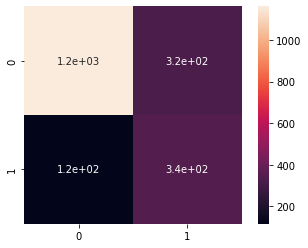

In [33]:
lr = LogisticRegression(penalty='l2',C=1)
classification_model(lr) 

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
gsCV_dtc = GridSearchCV(dtc,dtc_para,cv=3,scoring='accuracy')
gsCV_dtc.fit(x_train,y_train)
gsCV_dtc.best_params_

{'criterion': 'log_loss', 'splitter': 'best'}

Model: DecisionTreeClassifier
Accuracy Score: 82.66
f1 Score: 82.66
CV Score: 0.8193050193050194
ROC_AUC Score: 77.86
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1485
           1       0.62      0.69      0.65       458

    accuracy                           0.83      1943
   macro avg       0.76      0.78      0.77      1943
weighted avg       0.83      0.83      0.83      1943



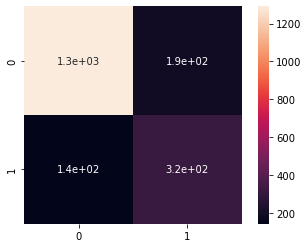

In [35]:
dtc = DecisionTreeClassifier(criterion='log_loss',splitter='best')
classification_model(dtc)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_para = {'n_estimators':range(50,250,50),'criterion':['gini','entropy']}
gsCV_rfc = GridSearchCV(rfc,rfc_para,cv=3,scoring='accuracy')
gsCV_rfc.fit(x_train,y_train)
gsCV_rfc.best_params_

{'criterion': 'entropy', 'n_estimators': 150}

Model: RandomForestClassifier
Accuracy Score: 89.5
f1 Score: 89.5
CV Score: 0.8734877734877735
ROC_AUC Score: 84.22
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1485
           1       0.80      0.74      0.77       458

    accuracy                           0.90      1943
   macro avg       0.86      0.84      0.85      1943
weighted avg       0.89      0.90      0.89      1943



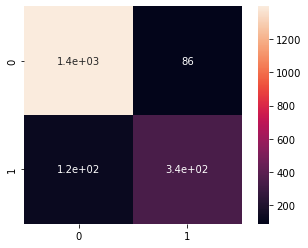

In [37]:
rfc = RandomForestClassifier(n_estimators=150,criterion='entropy')
classification_model(rfc)

In [38]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc_para = {'n_estimators':range(50,300,50),'algorithm':['SAMME','SAMME.R']}
gs_abc = GridSearchCV(abc,abc_para,cv=3,scoring='accuracy')
gs_abc.fit(x_train,y_train)
gs_abc.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 250}

Model: AdaBoostClassifier
Accuracy Score: 83.74
f1 Score: 83.74
CV Score: 0.8064350064350064
ROC_AUC Score: 78.04
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1485
           1       0.65      0.67      0.66       458

    accuracy                           0.84      1943
   macro avg       0.77      0.78      0.78      1943
weighted avg       0.84      0.84      0.84      1943



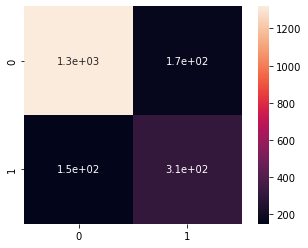

In [39]:
ada = AdaBoostClassifier(n_estimators=250,algorithm='SAMME.R')
classification_model(ada) 

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc_para = {'n_estimators':range(50,300,50),'loss':['log_loss','deviance','exponential'],
            'criterion':['friedman_mse','squared_error','mse']}
gs_gbc = GridSearchCV(gbc,gbc_para,cv=3,scoring='accuracy')
gs_gbc.fit(x_train,y_train)
gs_gbc.best_params_

{'criterion': 'friedman_mse', 'loss': 'exponential', 'n_estimators': 250}

Model: GradientBoostingClassifier
Accuracy Score: 85.8
f1 Score: 85.8
CV Score: 0.8202059202059202
ROC_AUC Score: 79.99
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1485
           1       0.70      0.69      0.70       458

    accuracy                           0.86      1943
   macro avg       0.80      0.80      0.80      1943
weighted avg       0.86      0.86      0.86      1943



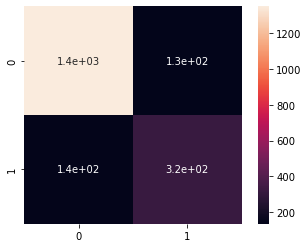

In [41]:
gbc = GradientBoostingClassifier(n_estimators=250,criterion='friedman_mse',loss='exponential')
classification_model(gbc) 

In [42]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc_para = {'n_estimators':range(50,250,50)}
gsCV_bc = GridSearchCV(bc,bc_para,scoring='accuracy')
gsCV_bc.fit(x_train,y_train)
gsCV_bc.best_params_

{'n_estimators': 150}

Model: BaggingClassifier
Accuracy Score: 89.19
f1 Score: 89.19
CV Score: 0.867181467181467
ROC_AUC Score: 84.25
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1485
           1       0.78      0.75      0.77       458

    accuracy                           0.89      1943
   macro avg       0.85      0.84      0.85      1943
weighted avg       0.89      0.89      0.89      1943



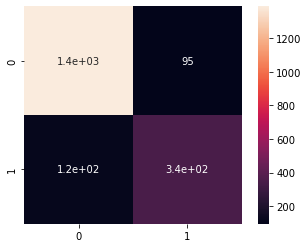

In [43]:
bc = BaggingClassifier(n_estimators=150)
classification_model(bc)

In [44]:
from sklearn.svm import SVC
svc = SVC()
svc_para={'C':[1,10],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
gsCV_svc = GridSearchCV(svc,svc_para,cv=3,scoring='accuracy')
gsCV_svc.fit(x_train,y_train)
gsCV_svc.best_params_

{'C': 10, 'kernel': 'rbf'}

Model: SVC
Accuracy Score: 83.58
f1 Score: 83.58
CV Score: 0.8413127413127415
ROC_AUC Score: 78.92
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1485
           1       0.64      0.70      0.67       458

    accuracy                           0.84      1943
   macro avg       0.77      0.79      0.78      1943
weighted avg       0.84      0.84      0.84      1943



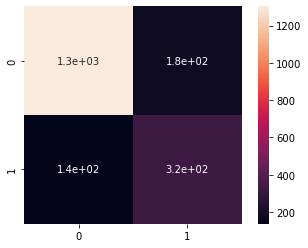

In [45]:
svc = SVC(kernel='rbf',C=10)
classification_model(svc)

In [46]:
classifier_models = pd.DataFrame({'Model Name':Model,'Accuracy Score':score,'F1 Score':f1,'CV Score':cross,
                                  'ROC_AUC Score':roc_auc})
classifier_models.sort_values(by='ROC_AUC Score',ascending=False)

,Model Name,Accuracy Score,F1 Score,CV Score,ROC_AUC Score
5,BaggingClassifier,89.19,89.19,0.867181,84.25
2,RandomForestClassifier,89.50,89.50,0.873488,84.22
4,GradientBoostingClassifier,85.80,85.80,0.820206,79.99
6,SVC,83.58,83.58,0.841313,78.92
3,AdaBoostClassifier,83.74,83.74,0.806435,78.04
1,DecisionTreeClassifier,82.66,82.66,0.819305,77.86
0,LogisticRegression,77.41,77.41,0.824710,76.46


BaggingClassifier and RandomForestClassifier have the best accuracies, CV score and a high ROC_AUC Score.

><div class='alert alert-box alert-info'>
    <b>ROC Curve and Feature Importance<b>

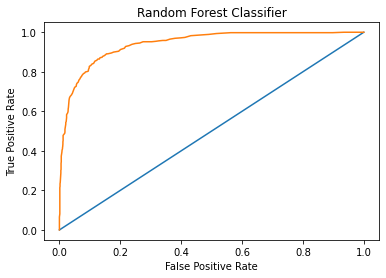

In [47]:
# Plotting ROC Curve for the model
from sklearn.metrics import roc_curve
y_pred_prob = rfc.predict_proba(x_test)[:,1]  #1 is the probabilty of threshold value
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

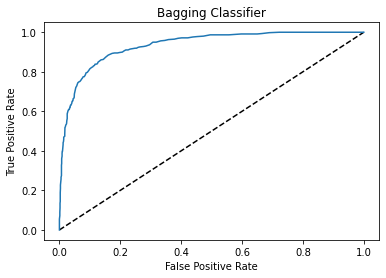

In [48]:
# Plotting ROC Curve for the model
from sklearn.metrics import roc_curve
y_pred_prob = bc.predict_proba(x_test)[:,1]  #1 is the probabilty of threshold value
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging Classifier')
plt.show()

<AxesSubplot:>

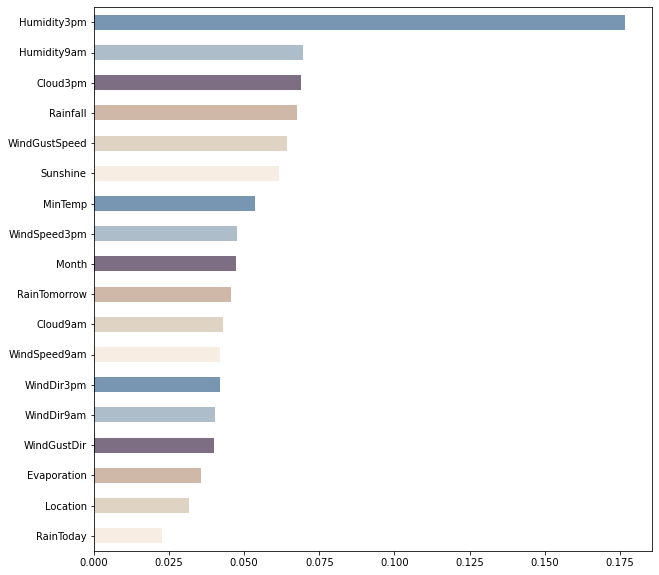

In [49]:
# Feature importance of the classifier
pd.Series(rfc.feature_importances_, index = df_new.columns[:-1]).sort_values(ascending=True).plot(kind='barh', figsize=(10,10),
                                                                                               color=(['#F8EDE3','#DFD3C3',
                                                                                                     '#D0B8A8','#7D6E83',
                                                                                                      '#AEBDCA','#7895B2']))

<div class='alert alert-box alert-info'>
    <b>Regression Model Building for Predicting "Rainfall"<b>

In [116]:
#splitting in X and Y

X = df_new.drop('Rainfall',axis=1)
Y = df_new['Rainfall']

In [117]:
X = power_transform(X,method='yeo-johnson')

In [118]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=8)

In [119]:
Y_train.value_counts()


0.0     4073
0.2      307
0.4      144
0.6       89
1.2       68
        ... 
29.8       1
2.9        1
26.4       1
30.0       1
25.4       1
Name: Rainfall, Length: 167, dtype: int64

In [120]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model_name, r2, mse, mae, rmse, model_score= [],[],[],[],[],[]

def regr(model):
    model.fit(X_train,Y_train) #fitting the training data into the model
    Y_pred = model.predict(X_test) #predicting the target variable
    scoree = round(model.score(X_train,Y_train)*100,2) #score
    r2_s = round(r2_score(Y_test,Y_pred)*100,2) 
    mae_ = mean_absolute_error(Y_test,Y_pred) 
    mse_ = mean_squared_error(Y_test,Y_pred)
    rmse_ = mean_squared_error(Y_test,Y_pred,squared=False)
    
    print("Model:",str(model).split('(')[0])
    model_name.append(str(model).split('(')[0])
    
    print("Score:",scoree)
    model_score.append(scoree)
    
    print("R2 Score:",r2_s)
    r2.append(r2_s)
    
    print("MAE:",mae_)
    mae.append(mae_)
    
    print("MSE:",mse_)
    mse.append(mse_)
    
    print("RMSE:",rmse_)
    rmse.append(rmse_)

In [121]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
def run_regr():
    models = [LinearRegression(),
             SVR(), DecisionTreeRegressor(), ExtraTreeRegressor(),
             KNeighborsRegressor(), GradientBoostingRegressor(),
             BaggingRegressor(), AdaBoostRegressor(),RandomForestRegressor()]
    for i in models:
        regr(i), print('-'*50,'\n')

In [122]:
run_regr()

Model: LinearRegression
Score: 49.03
R2 Score: 52.58
MAE: 1.5429291377396286
MSE: 10.682404262042368
RMSE: 3.268394753092467
-------------------------------------------------- 

Model: SVR
Score: 45.96
R2 Score: 47.42
MAE: 1.1893506292932075
MSE: 11.845529431200921
RMSE: 3.4417334921810725
-------------------------------------------------- 

Model: DecisionTreeRegressor
Score: 100.0
R2 Score: 33.97
MAE: 1.1562419562419561
MSE: 14.875791505791508
RMSE: 3.856914765170668
-------------------------------------------------- 

Model: ExtraTreeRegressor
Score: 100.0
R2 Score: 32.8
MAE: 1.173166023166023
MSE: 15.137612612612612
RMSE: 3.8907084975120676
-------------------------------------------------- 

Model: KNeighborsRegressor
Score: 65.6
R2 Score: 50.29
MAE: 1.2696010296010296
MSE: 11.198393307593307
RMSE: 3.346400051935409
-------------------------------------------------- 

Model: GradientBoostingRegressor
Score: 63.76
R2 Score: 59.25
MAE: 1.2580143771771046
MSE: 9.180066381695347
RMSE:

<div class='alert alert-box alert-info'>
    <b>Hyperparameter Tuning the best Regression Model<b>

In [123]:
rfr = RandomForestRegressor()
rfr_para = {'max_features':['sqrt','log2']}
gs_rfr = GridSearchCV(rfr,rfr_para,cv=3,scoring='accuracy')
gs_rfr.fit(X_train,Y_train)
gs_rfr.best_params_

{'max_features': 'sqrt'}

In [124]:
rfr = RandomForestRegressor(max_features='sqrt')
regr(rfr)

Model: RandomForestRegressor
Score: 94.92
R2 Score: 66.8
MAE: 1.0888011583011583
MSE: 7.4784090186615195
RMSE: 2.7346679905724423


<div class='alert alert-box alert-info'>
    <b>Saving Files<b>

In [125]:
import joblib
joblib.dump(bc,'BC_Rainfall.pkl')

['BC_Rainfall.pkl']

In [126]:
joblib.dump(rfc,'RFC_Rainfall.pkl')

['RFC_Rainfall.pkl']

In [127]:
joblib.dump(rfr,'RFR_Rainfall.pkl')

['RFR_Rainfall.pkl']